In [1]:
%matplotlib notebook

In [2]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sp
from scipy import signal
import librosa
import os

In [3]:
dir_path = '../data/'

In [4]:
mp3_file_name_list = os.listdir(dir_path)
mp3_file_name_list.sort()

In [5]:
original_suffix = '_original.mp3'
chiptune_suffix = '_chiptune.mp3'

music_name_set = set([file_name.split('_')[0] for file_name in mp3_file_name_list])

print(music_name_set)

{'TT', 'FEVER', 'ICY', 'ROOKIE', 'BINGLE BANGLE', 'FANCY', 'HIP', 'YES OR YES', 'DANCE THE NIGHT AWAY', 'DALLA DALLA', 'KDA ', 'PLAYING WITH FIRE', 'DDU DU DDU DU', 'POP-STARS'}


In [6]:
music_name_list = [music_name for music_name in music_name_set \
 if (music_name + original_suffix) in mp3_file_name_list and (music_name + chiptune_suffix) in mp3_file_name_list]

In [7]:
chiptune_file_name_list = list()
original_file_name_list = list()

# for file_name in mp3_file_name_list:
#     if 'chiptune' in file_name:
#         chiptune_file_name_list.append(file_name)
#     elif 'original' in file_name:
#         original_file_name_list.append(file_name)
#     else:
#         print("File name {} of unknown type".format(file_name))

for music_name in music_name_list:
    chiptune_file_name_list.append(music_name + chiptune_suffix)
    original_file_name_list.append(music_name + original_suffix)

print(chiptune_file_name_list)
print(original_file_name_list)

['FEVER_chiptune.mp3', 'ICY_chiptune.mp3', 'BINGLE BANGLE_chiptune.mp3', 'HIP_chiptune.mp3', 'DALLA DALLA_chiptune.mp3']
['FEVER_original.mp3', 'ICY_original.mp3', 'BINGLE BANGLE_original.mp3', 'HIP_original.mp3', 'DALLA DALLA_original.mp3']


In [8]:
audio_chiptune = AudioSegment.from_mp3(os.path.join(dir_path, chiptune_file_name_list[0]))

audio_original = AudioSegment.from_mp3(os.path.join(dir_path, original_file_name_list[0]))

In [10]:
audio_chiptune_array = np.asarray(audio_chiptune.get_array_of_samples())
if (audio_chiptune_array.dtype == np.dtype(np.int16)):
    audio_chiptune_array = audio_chiptune_array / 2**15
    pass
else: 
    print(audio_chiptune_array.dtype)

fs_chiptune = 44100
    
if audio_chiptune.frame_rate != 44100:
    print(audio_chiptune.frame_rate)
    fs_original = audio_chiptune.frame_rate
    
audio_original_array = np.asarray(audio_original.get_array_of_samples())
if (audio_original_array.dtype == np.dtype(np.int16)):
    audio_original_array = audio_original_array / 2**15
    pass
else: 
    print(audio_original_array.dtype)

fs_original = 44100
    
if audio_original.frame_rate != 44100:
    print(audio_original.frame_rate)
    fs_original = audio_original.frame_rate
    

48000


In [21]:
import sys
sys.getsizeof(audio_original_array)

189676096

<IPython.core.display.Javascript object>


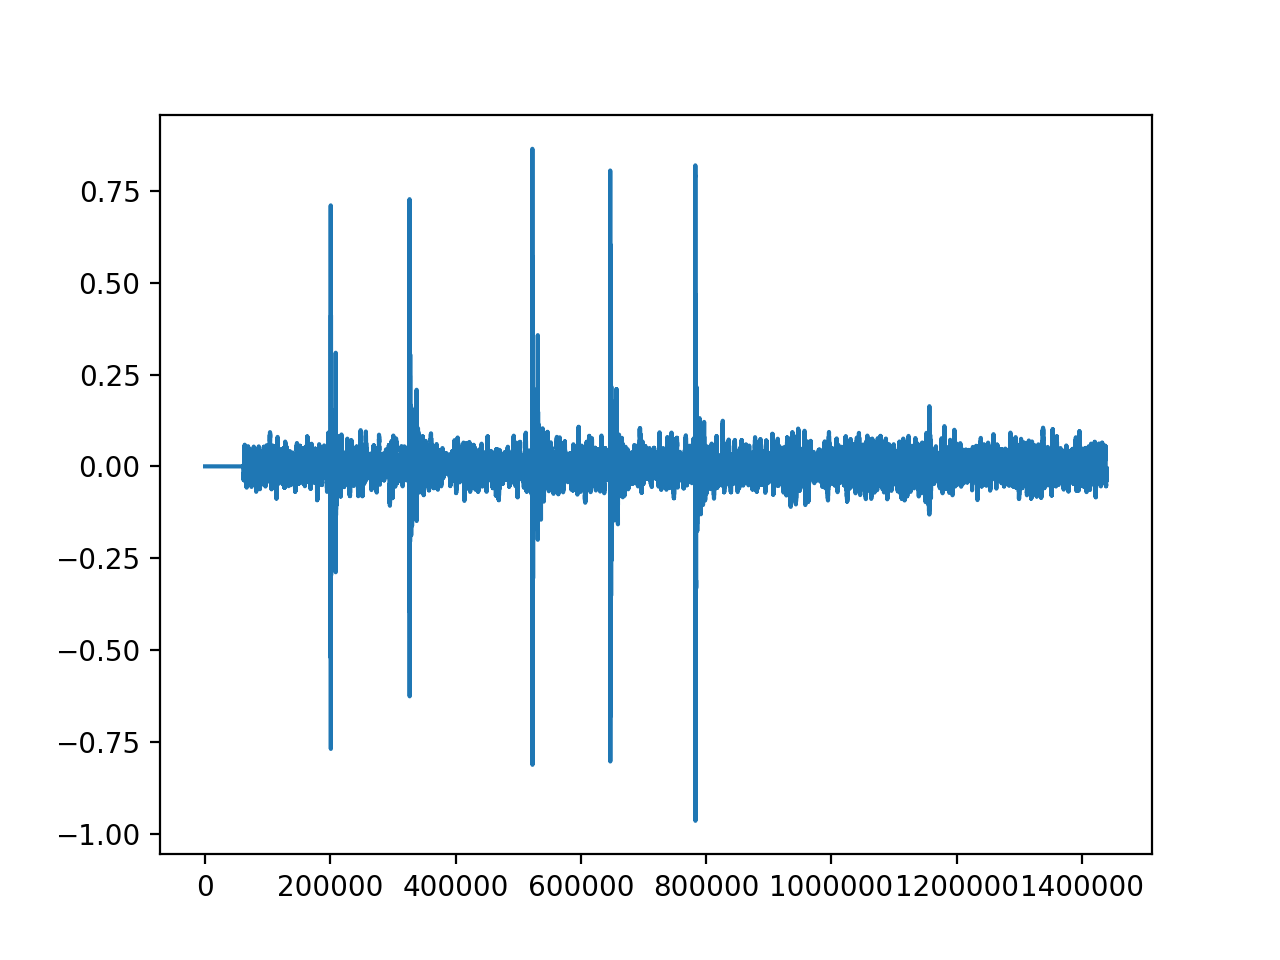

In [14]:
plt.figure()
plt.plot(audio_original_array[:fs_original * 30])
plt.show()

<IPython.core.display.Javascript object>


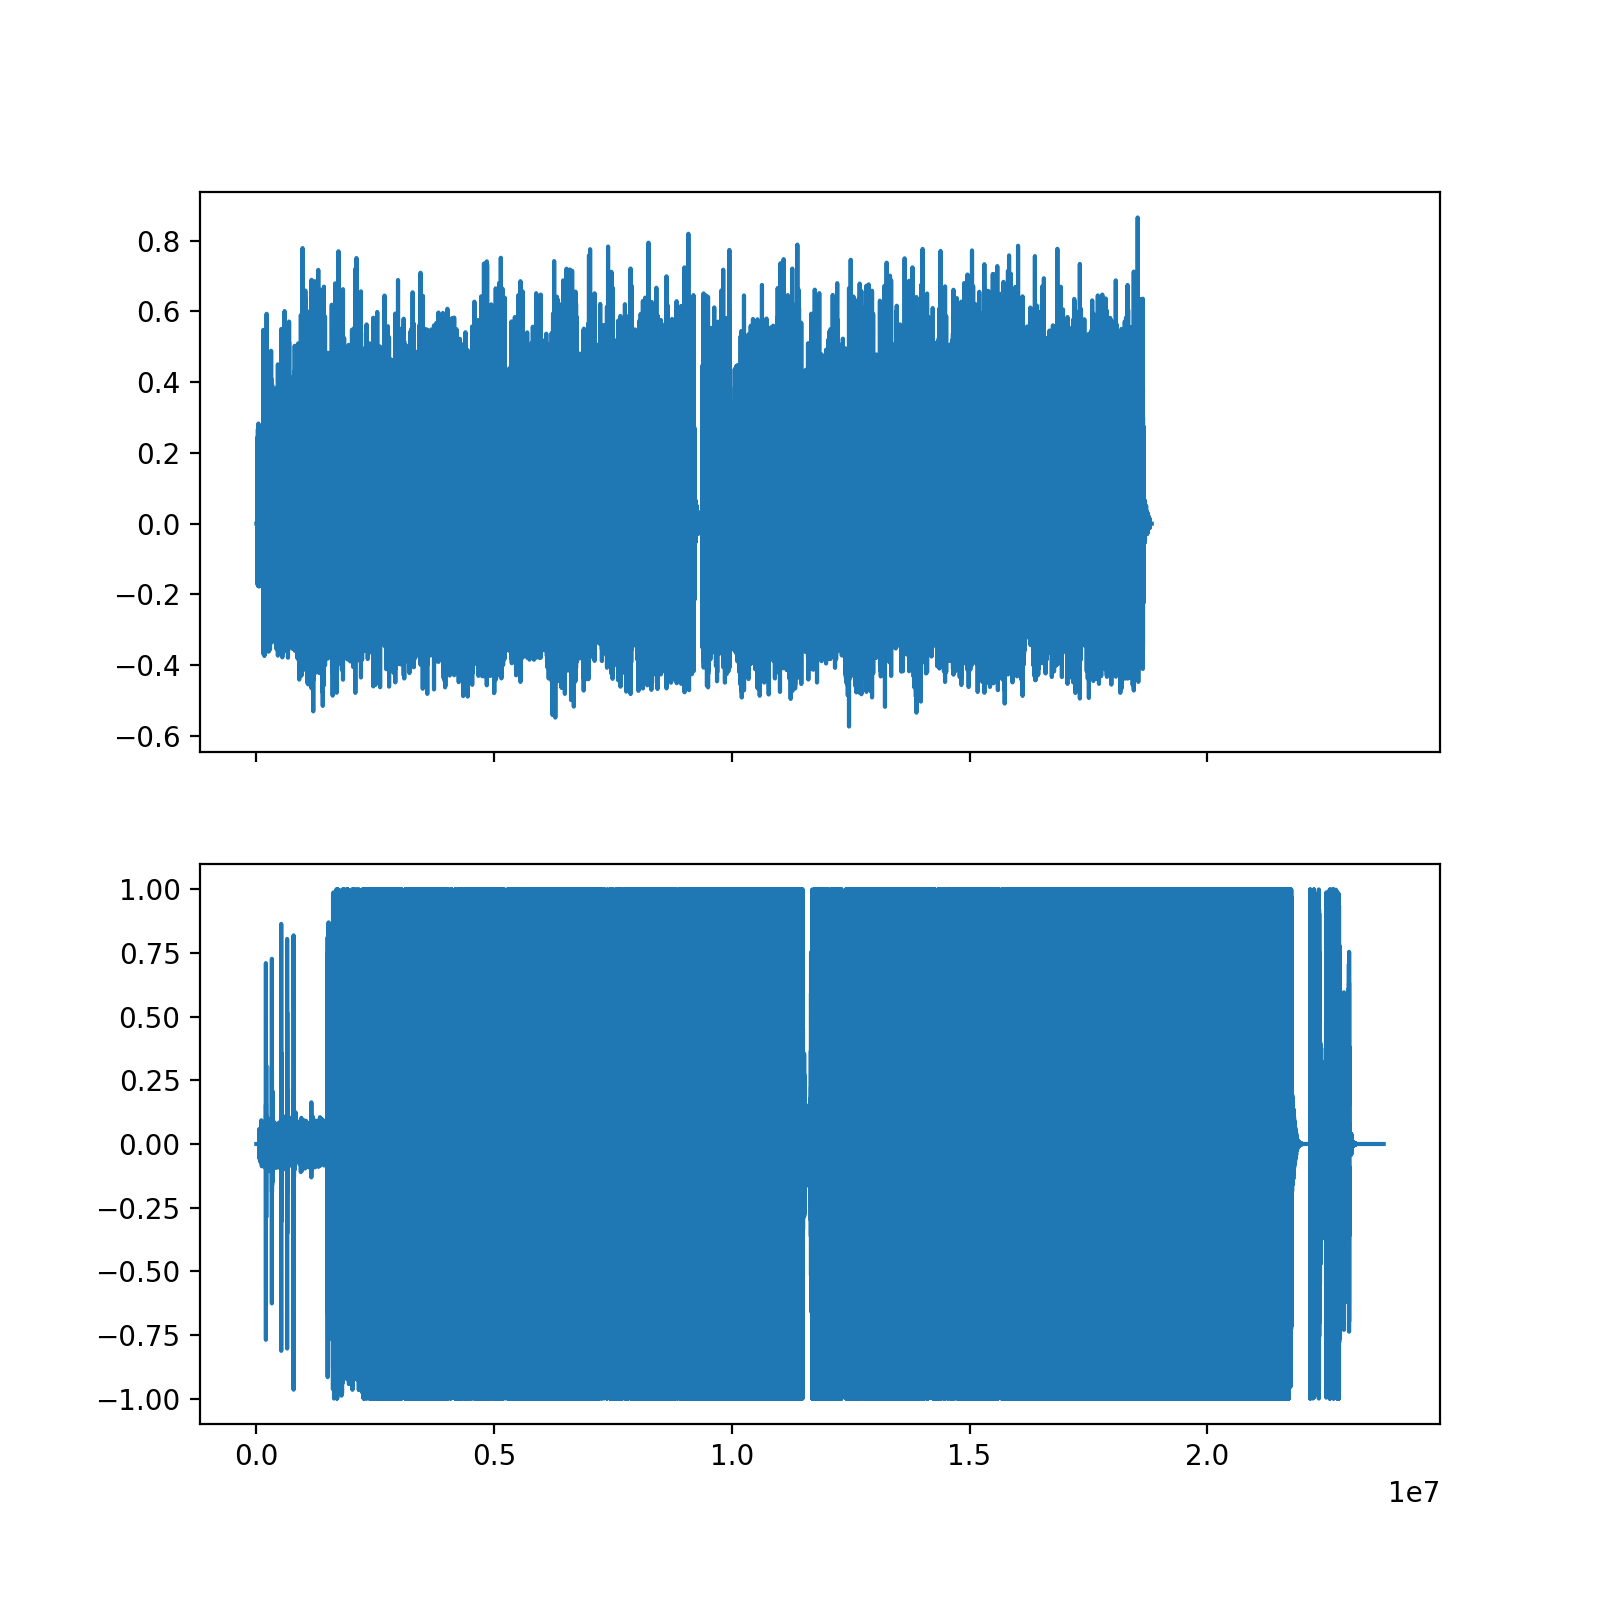

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
axes[0].plot(audio_chiptune_array)
axes[1].plot(audio_original_array)
plt.show()

In [16]:
fs = 44100
nsc_in_second = 0.05
nov_in_second = 0.025

f, t, Zxx_chiptune = signal.stft(audio_chiptune_array, fs=fs_chiptune, 
                                 nperseg=fs_chiptune * nsc_in_second, 
                                 noverlap=fs_chiptune * nov_in_second, 
                                 return_onesided=True)
f_oneside = f[:int(len(f)/2)]
Zxx_chiptune_oneside = Zxx_chiptune[:int(len(f)/2), :]
# Zxx_chiptune_oneside = Zxx_chiptune[:, :]

print(max(f_oneside))

f, t, Zxx_orignal = signal.stft(audio_original_array, fs=fs_original, 
                                nperseg=fs_original * nsc_in_second, 
                                noverlap=fs_original * nov_in_second, 
                                return_onesided=True)
f_oneside = f[:int(len(f)/2)]
Zxx_original_oneside = Zxx_orignal[:int(len(f)/2), :]
# Zxx_original_oneside = Zxx_orignal[:, :]

print(max(f_oneside))

11000.0
11980.0


<IPython.core.display.Javascript object>


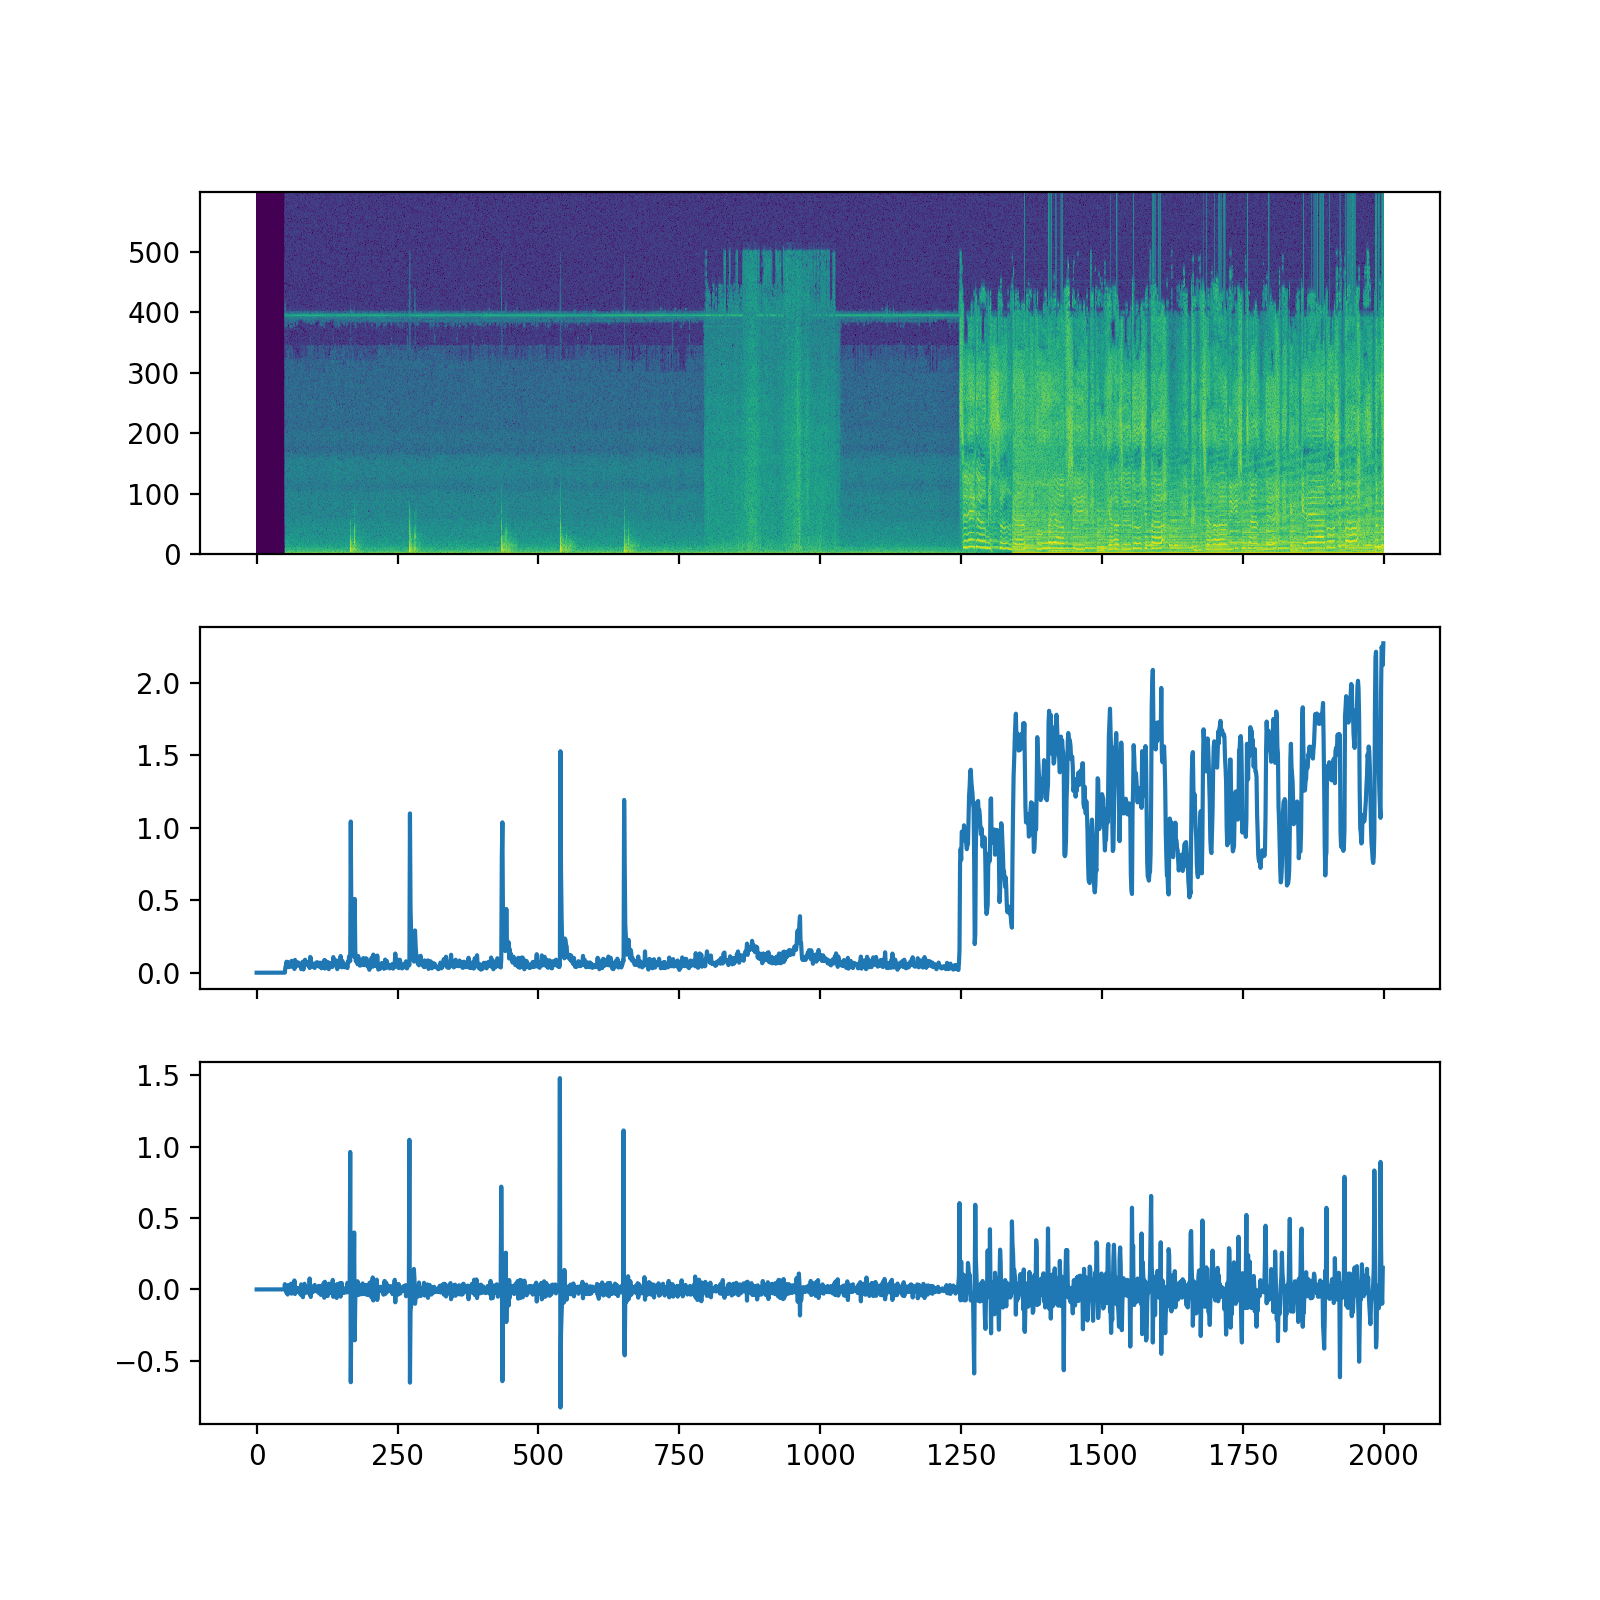

<IPython.core.display.Javascript object>


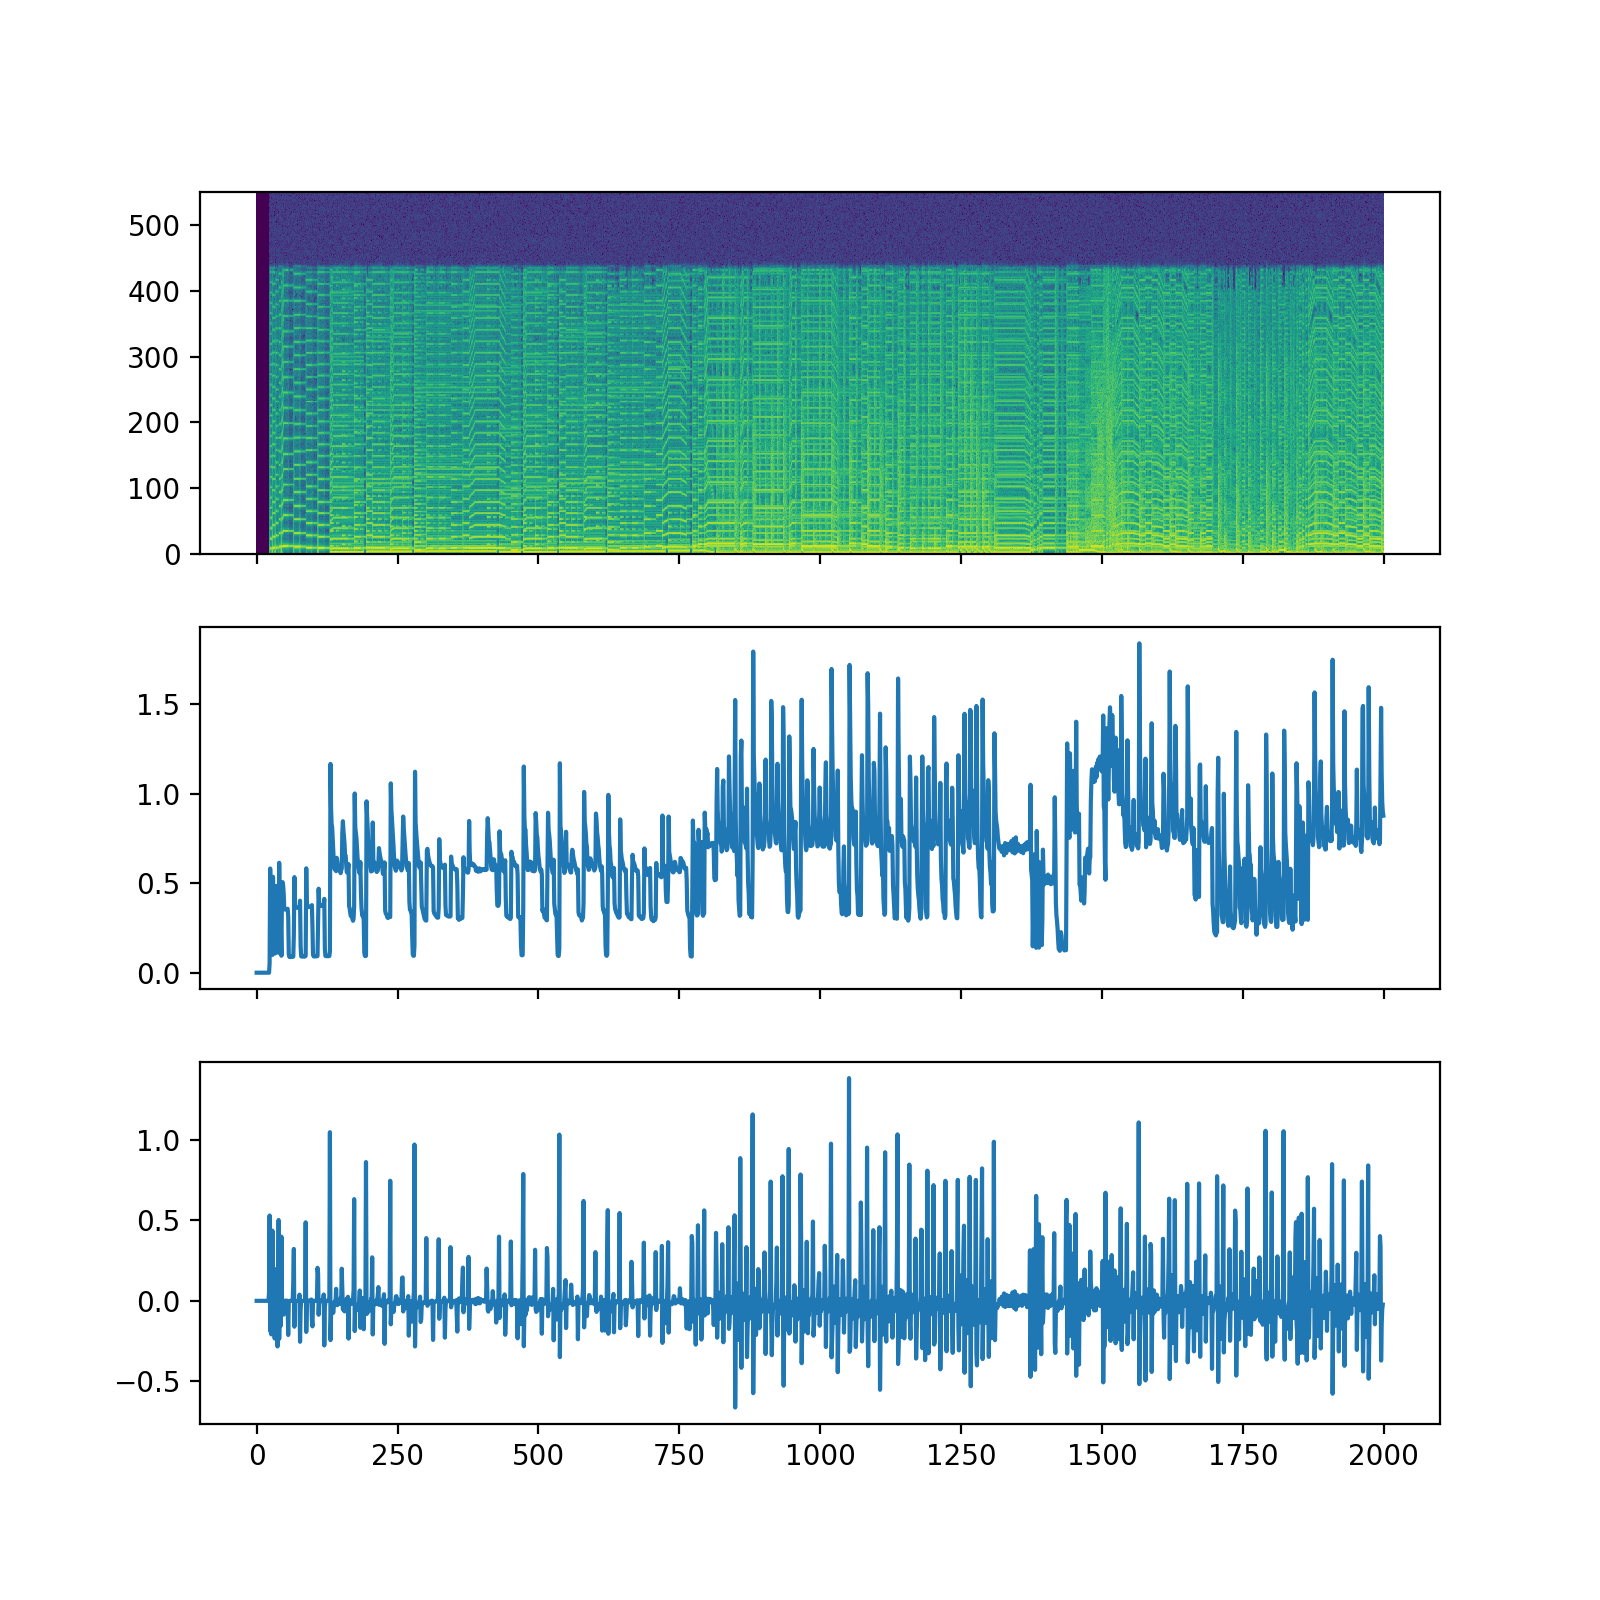

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

visible_time_step = int(1 / nsc_in_second * 40)
visible_time_step = 2000

log_spectrogram = 20 * np.log10(np.maximum(np.abs(Zxx_original_oneside[:, :]), 1e-8))
axes[0].imshow(log_spectrogram[:, :visible_time_step], origin='reversed')
axes[0].set_aspect('auto')

axes[1].plot(np.sum(np.abs(Zxx_original_oneside[:, :visible_time_step]), 0))

axes[2].plot(np.diff(np.sum(np.abs(Zxx_original_oneside[:, :visible_time_step]), 0)))

# time_step_energy_original = np.sum(np.abs(Zxx_original_oneside), 0)
time_step_energy_original = np.sum(log_spectrogram, 0) * -1

fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

log_spectrogram = 20 * np.log10(np.maximum(np.abs(Zxx_chiptune_oneside[:, :]), 1e-8))
axes[0].imshow(log_spectrogram[:, :visible_time_step], origin='reversed')
axes[0].set_aspect('auto')

axes[1].plot(np.sum(np.abs(Zxx_chiptune_oneside[:, :visible_time_step]), 0))
axes[2].plot(np.diff(np.sum(np.abs(Zxx_chiptune_oneside[:, :visible_time_step]), 0)))

# time_step_energy_chiptune = np.sum(np.abs(Zxx_chiptune_oneside), 0)
time_step_energy_chiptune = np.sum(log_spectrogram, 0) * -1

plt.show()



In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

energy_time_stream_original = np.diff(np.sum(np.abs(Zxx_original_oneside[:, :]), 0))
energy_time_stream_chiptune = np.diff(np.sum(np.abs(Zxx_chiptune_oneside[:, :]), 0))

energy_time_stream_original = energy_time_stream_original / np.max(energy_time_stream_original)

energy_time_stream_chiptune = energy_time_stream_chiptune / np.max(energy_time_stream_chiptune)

axes[0].plot(energy_time_stream_original)
axes[0].plot(energy_time_stream_chiptune[12:])

# axes[1].plot(energy_time_stream_original - np.append(energy_time_stream_chiptune[6:], np.zeros(6)))

plt.show()

In [ ]:
time_step_energy_original_normal = time_step_energy_original / np.sum(time_step_energy_original)

time_step_energy_chiptune_normal = time_step_energy_chiptune / np.sum(time_step_energy_chiptune)

In [ ]:
time_step_energy_chiptune_normal.shape

In [ ]:
convolved_energy = np.convolve(time_step_energy_original_normal, time_step_energy_chiptune_normal, 'full')
convolved_energy = convolved_energy[int(len(convolved_energy)/2):]

In [ ]:
plt.figure()
plt.plot(convolved_energy)
plt.show()

np.argmax(convolved_energy)

In [ ]:
# Check Mel Bands Here

mel_band_matrix = librosa.filters.mel(44100, len(f) - 2, n_mels=80)

print(mel_band_matrix.shape)

plt.figure()
plt.imshow(mel_band_matrix, aspect='auto')
plt.show()

Sxx_chiptune_oneside = np.abs(Zxx_chiptune_oneside)

print(Sxx_chiptune_oneside.shape)

Sxx_original_oneside = np.abs(Zxx_original_oneside)

print(Sxx_original_oneside.shape)

mel_Sxx_chiptune = np.matmul(mel_band_matrix, Sxx_chiptune_oneside)

mel_Sxx_original = np.matmul(mel_band_matrix, Sxx_original_oneside)

In [ ]:
visible_time_step = 2000

plt.figure(figsize=(14, 3))
log_mel_chiptune = 20 * np.log10(np.maximum(np.abs(mel_Sxx_chiptune[:, :visible_time_step]), 1e-8))
plt.imshow(log_mel_chiptune, aspect='auto', origin='reversed')
plt.show()

plt.figure(figsize=(14, 3))
log_mel_original = 20 * np.log10(np.maximum(np.abs(mel_Sxx_original[:, :visible_time_step]), 1e-8))
plt.imshow(log_mel_original, aspect='auto', origin='reversed')
plt.show()

In [ ]:
start= 1800
log_mel_chiptune_of_interest = (log_mel_chiptune[:, start:start+300] + 160) / 160
# normalized_log_mel_chiptune_of_interest = 

# conv_return = signal.convolve2d(log_mel_original, log_mel_chiptune_of_interest, mode='valid')
conv_return = signal.convolve2d((log_mel_chiptune + 160) / 160, log_mel_chiptune_of_interest, mode='valid')


In [ ]:
conv_return.shape

In [ ]:
plt.figure()
plt.imshow(log_mel_chiptune_of_interest, aspect='auto')
plt.colorbar()
plt.show()

plt.figure()
plt.plot(conv_return[0])
plt.show()

plt.figure()
normalized_chiptune_energy_sum = np.sum((log_mel_chiptune + 160) / 160, 0)
plt.plot(normalized_chiptune_energy_sum)
plt.show()

conv_return_normalized = [conv_return[0][i] / (normalized_chiptune_energy_sum[i] + 100) for i in range(len(conv_return[0]))]

plt.figure()
plt.plot(conv_return_normalized)
plt.show()





In [ ]:
# Compute local onset autocorrelation
# y, sr = librosa.load(librosa.util.example_audio_file())
y = audio_chiptune_array
sr = 44100
hop_length = 4410 * 2
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(4, 1, 2)
# We'll truncate the display to a narrower range of tempi
# librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
#                          x_axis='time', y_axis='tempo')
plt.imshow(tempogram)
plt.axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(4, 1, 3)
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
plt.plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
plt.xlabel('Lag (seconds)')
plt.axis('tight')
plt.legend(frameon=True)
plt.subplot(4,1,4)
# We can also plot on a BPM axis
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
plt.semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
plt.semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
plt.axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True)
plt.xlabel('BPM')
plt.axis('tight')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Compute local onset autocorrelation
# y, sr = librosa.load(librosa.util.example_audio_file())
y = audio_original_array
sr = 44100
hop_length = 4410 * 2
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(4, 1, 2)
# We'll truncate the display to a narrower range of tempi
# librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
#                          x_axis='time', y_axis='tempo')
plt.imshow(tempogram)
plt.axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(4, 1, 3)
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
plt.plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
plt.xlabel('Lag (seconds)')
plt.axis('tight')
plt.legend(frameon=True)
plt.subplot(4,1,4)
# We can also plot on a BPM axis
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
plt.semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
plt.semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
plt.axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
plt.legend(frameon=True)
plt.xlabel('BPM')
plt.axis('tight')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
portion_length = 100

random_offset = int(np.random.random() * (len(time_step_energy_original) - portion_length))

print('Random Offset: {}'.format(random_offset))

time_step_energy_original_portion = time_step_energy_original[random_offset:random_offset+portion_length]

plt.figure()
plt.plot(time_step_energy_original_portion)
plt.show()

In [ ]:
convolved_energy = np.convolve(time_step_energy_chiptune, \
                               time_step_energy_original_portion, 'same') / \
                                len(time_step_energy_original_portion)

plt.figure(figsize=(14, 14))
plt.plot(convolved_energy)
plt.show()

max_index = np.argmax(convolved_energy)
print('Max index position: {}'.format(max_index))